<center><h1>ECSE 443: Introduction to Numerical Analysis in Electrical Engineering</center></h1>
<center><h3>Assignment 1: _Linear least squares_</center></h3>
<center><h3>Due: Monday, February 10<sup>th</sup>, 2020 at 11:59pm EST on on <a href='https://mycourses2.mcgill.ca/'>myCourses</a></center></h3>
<center><h3>Final weight: 15%</center></h3>
$\newcommand{\norm}[1]{\left\| #1 \right\|}$
$\newcommand{\normsq}[1]{\norm{#1}^2}$
$\newcommand{\bsalpha}{\boldsymbol{\alpha}}$
$\newcommand{\bfa}{\mathbf{a}}$
$\newcommand{\bfb}{\mathbf{b}}$
$\newcommand{\bfe}{\mathbf{e}}$
$\newcommand{\bfr}{\mathbf{r}}$
$\newcommand{\bfv}{\mathbf{v}}$
$\newcommand{\bfx}{\mathbf{x}}$
$\newcommand{\bfy}{\mathbf{y}}$
$\newcommand{\cond}{\operatorname{cond}}$
$\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment submission process

Download and modify the `ipynb` notebook we provide on myCourses and submit your modified file, renamed according to your student ID, as

<font color='red'>[YourStudentID].ipynb</font>

For example, if your id is **234567890**, your submission filename should be **234567890.ipynb**.


<div class="alert alert-warning" role="alert">
     Note that every time you submit a new file, your previous submission will be overwritten.  <b>All submissions must be made using myCourses</b>. You can submit as many times as you like, but we will only grade the last submission.
</div>

## Late policy
This assignment is to be completed individually. 

<div class="alert alert-danger" role="alert">
     You will lose <b>5% per hour</b>. past the deadline, up to a maximum of -100%. 
</div>
    
## Python `import` statements

We provide all import statements required to complete the assignment.

<div class="alert alert-danger" role="alert">
    You must not use any `<code>import</code>'s other than the ones we provide.
    Doing so will result in a score of <b>zero (0%)</b>on the assignment.
</div>

# Forward and backward substitution [20%]

We will start by implementing the *forward* and *backward substitution* algorithms to solve lower and upper triangular linear systems of equations. These algorithms will also form the foundation for more complex algorithms, later on.

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell in the Jupyter Notebook to include the required modules.
</div>

In [1]:
from numpy import array, zeros, tril, triu, absolute

## Forward substitution [10%]

Forward substitution is the process of solving a linear system of equations $\mathbf{L}\bfx=\bfb$ with a lower triangular coefficient matrix $\mathbf{L}$. The formula below defines the elements $x_i$ of $\mathbf{x}$ that are computed using forward substitution:
$$
x_{i} = 
\begin{cases}
    \displaystyle\frac{b_{1}}{L_{1,1}}  & \quad \text{if } i = 1,  \\
    \displaystyle\frac{1}{L_{i,i}}\left(b_{i} - \sum\limits_{j = 1}^{i-1} L_{i,j} x_{j}\right) & \quad \text{ otherwise. } 
    \end{cases}
$$

<div class="alert alert-info" role="alert"> 
    <b style="color:green;">&#9745;</b> <b>Complete the forward substitution algorithm implementation</b> in the cell below:
</div>

In [2]:
def ForwardSubstitution(L, b):
    """
    Perform forward substitution of to solve Lx = b, where L is a lower triangular matrix

    Parameters: 
    L (np.array((n, n))): Left hand side (LHS) lower triangular matrix
    b (np.array(n)): Right hand side (RHS) vector 

    Returns: 
    x np.array(n): Solution vector
    """
    

    # Save the dimensions of L
    m, n = L.shape

    # L must be square
    if m != n:
        raise Exception("Sorry, it's hip to be square!")

    # Initialize x
    x = zeros(n)
    
    # Outer loop: loop over all rows, from left to right
        # Set x[i] as b[i]
        # Inner loop: loop over each column from left to diagonal
            # Update x[i] 
        # divide by diagonal value to isolate x[i]
    
    # YOUR CODE HERE
    summ = 0
    for i in range (m): #outer loop.Go through each column.
        x[i]=b[i] 
        for j in range (i): #inner loop rows. Go through each row.
            summ += (L[i,j]*x[j])
        x[i] -= summ
        summ = 0
        x[i] = x[i]/L[i,i]       
        
    # raise NotImplementedError()
    return x

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell to test your forward substitution solver.
</div>

In [3]:
L = tril([[4,12,-16],[12,37,-43],[-16,-43,98]])
b = array([1,2,3])         
x = ForwardSubstitution(L, b)
print('L = ', L)
print('b = ', b)
print('x = ', x)
print('L.dot(x) = ', L.dot(x))

try:
    assert((absolute(L.dot(x) - b) < 1e-5).all())
    print('You computed the correct result!')
except:
    raise Exception("If at first you don't succeed...")

L =  [[  4   0   0]
 [ 12  37   0]
 [-16 -43  98]]
b =  [1 2 3]
x =  [ 0.25       -0.02702703  0.05956977]
L.dot(x) =  [1. 2. 3.]
You computed the correct result!


## Backward substitution [10%]

Backward substitution is the process of solving a linear system of equations $\mathbf{U}\bfx=\bfb$ with an upper triangular coefficient matrix $\mathbf{U}$. These equation similarly define the solution element $x_i$ of $\mathbf{x}$ that you will compute using backward substitution:
$$
x_{i} = 
\begin{cases}
    \displaystyle\frac{b_{n}}{U_{n,n}}  & \quad \text{if } i = n,  \\
    \displaystyle\frac{1}{U_{i,i}}\left( b_{i} - \displaystyle\sum\limits_{j = i+1}^{n} U_{i,j} x_{j} \right) & \quad \text{otherwise. } 
    \end{cases}
$$


<div class="alert alert-info" role="alert"> 
    <b style="color:green;">&#9745;</b> <b>Complete the backward substitution algorithm implementation</b> in the cell below:
</div>


In [4]:
def BackwardSubstitution(U, b):
    """
    Perform back substitution of to solve Ux=b where U is an upper triangular matrix

    Parameters: 
    U (np.array((n, n))): LHS upper triangular matrix
    b (np.array(n)): RHS vector 

    Returns: 
    x np.array(n): Solution vector
    """

    # Save dimension of U
    m, n = U.shape

    # U must be square
    if m != n:
        raise Exception("Sorry, it's hip to be square")

    # Initialize x
    x = zeros(n)
    
    # Outer loop: loop over all rows from bottom to top
        # Set temporary variable as the current b[i]
        # Inner loop: loop over each column from right to diagonal.
            # Update temporary variable from the already known x[j] and U[i,j]
        # divide by diagonal value to isolate x[i]
    
    # YOUR CODE HERE
    temp = 0
    for i in range (m-1, -1, -1): #outer loop. Go through each column.
        temp = b[i] 
        for j in range (i+1, n):  #inner loop rows. Go through each row.
            temp -= (U[i][j]*x[j])
        x[i] = temp/U[i,i]   
        
#     raise NotImplementedError()
    
    return x

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell to test your backward substitution solver.
</div>

In [5]:
U = triu([[4.,12.,-16.],[12.,37.,-43.],[-16.,-43.,98.]])
b = array([1.,2.,3.])        
x = BackwardSubstitution(U, b)
print('U = ', U)
print('b = ', b)
print('x = ', x)
print('U.dot(x) = ', U.dot(x))

try:
    assert((absolute(U.dot(x) - b) < 1e-5).all())
    print('You\'re on a roll!')
except:
    raise Exception("Better luck, next time...")

U =  [[  4.  12. -16.]
 [  0.  37. -43.]
 [  0.   0.  98.]]
b =  [1. 2. 3.]
x =  [0.10355764 0.08963045 0.03061224]
U.dot(x) =  [1. 2. 3.]
You're on a roll!


# Polynomial fitting via linear least squares [50%]

We will implement our own *linear least squares* solver using two different approaches, testing them on a *polynomial fitting* problem.
Given an overdetermined matrix $\mathbf{A}$ of dimension $m \times n$, where $m > n$, and a  $m \times 1$ column vector $\bfb$, we want to find the $n \times 1$ column vector $\bfx$ that best fits the linear equation $\mathbf{A}\bfx \approx \bfb$ in the least-squares sense.

We write $\mathbf{A}\bfx \approx b$ instead of $\mathbf{A}\bfx = \bfb$ because the true linear system is not generally satisfiable. 
Specifically, our fit $\bfx$ will minimize the squared 2-norm of the residual vector $\bfr = \mathbf{A}\bfx - \bfb$, i.e.: 
$$\argmin{\bfx}\normsq{\mathbf{A}\bfx - \bfb}~.$$

![An example least-squares fit of a higher-order polynomial.](polyfit.png)

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell to include the required modules.
</div>


In [6]:
from numpy import array, linspace, identity, copy, dot, zeros, zeros_like, sqrt, outer, polyval, poly1d, absolute
from numpy.random import random
from numpy.linalg import cond, norm
import matplotlib.pyplot as plt

## Learning objectives
The goals of this assignment component are for you to:
1. implement a Cholesky decomposition and apply it to the linear least squares solution expressed using the *normal equations*;
2. implement a QR decomposition and apply it to the linear least squares solution expressed using the *normal equations*;
3. understand when using each of these methods is preferrable to the other; and,
4. to solve a overdetermined polynomial fitting problem using linear least squares.




## Solving Normal Equations using Cholesky

### Cholesky decomposition [10%]
Suppose that $\mathbf{M}$ is a square matrix of dimension $n \times n$ satisfying the following properties:
1. $\mathbf{M}$ is symetric, e.g., $\mathbf{M} = \mathbf{M}^\intercal$, and
2. $\mathbf{M}$ is positive definite, e.g., $\bfx \mathbf{M} \bfx^\intercal > 0$ for all column vectors $\bfx$ of dimension $1 \times n$ such that $\norm{\bfx} \neq 0$.

Then, $\mathbf{M}$ admits the unique Cholesky decomposition 
$$\mathbf{M}= \mathbf{L} \mathbf{L}^\intercal~,$$ 
where $\mathbf{L}$ is a lower triangular matrix with real and positive diagonal entries.

After some algebraic manipulation, we can arrive at:
$$
L_{i,j} = 
\begin{cases}
    \sqrt{M_{j,j} - \sum\limits_{k=1}^{j-1}L_{j,k}^2} & \quad \text{if } i = j,  \\
    \frac{1}{L_{j,j}}\left(M_{i,j} - \sum\limits_{k=1}^{j-1}L_{i,k}L_{j,k}\right) & \quad \text{if } i > j, \\
     0 & \quad \text{otherwise.} 
    \end{cases}
$$

We see that we can compute the $L_{i, j}$ entry of $\mathbf{L}$ if we know the entries to the left and above. The *Cholesky-Banachiewicz algorithm* starts from the upper left corner of the matrix $\mathbf{L}$ and proceeds to calculate its elements row by row.

![Access pattern (white) and writing pattern (yellow) for the Cholesky-Banachiewicz algorithm on a $5\times 5$ matrix.](https://upload.wikimedia.org/wikipedia/commons/b/be/Chol.gif)


<div class="alert alert-info" role="alert"> 
    <b style="color:green;">&#9745;</b> <b>Complete the implementation of the Cholesky decomposition</b>  in the cell below.
    To avoid having the algorithm stop midway through the decomposition due to numerical precision, compute the diagonal entries as
    $$
    L_{j,j} = \sqrt{\left|M_{j,j} - \sum\limits_{k=1}^{j-1}L_{j,k}^2\right|}
    $$
    instead of as in the original formula.
</div>




In [7]:
def CholeskyDecomposition(A):
    """ 
    Performs a Cholesky decomposition of a square matrix A = LL.T. A must be symmetric and positive definite. Here, L is a lower triangular matrix

    Parameters: 
    A (np.array((n, n))): Matrix that we want to decompose 

    Returns: 
    L (np.array((n, n))): Lower triangular matrix L
    """

    # Save dimension of A for easier use
    m, n = A.shape
    
    # A must be square
    if m != n:
        raise Exception("Sorry, it's hip to be square!")

    # Create zero matrix for L
    L = zeros(A.shape)
    
    # Iterate over rows, from top to bottom
        # Iterate over columns, from left to diagonal.
            # Compute the sum
            # Check if at a diagonal entry
               # update diagonal entries and don't forget to take the absolute value prior to the sqrt
            # otherwise
                # deal with lower diagonal entries
    
    # YOUR CODE HERE
    for i in range(n):   # Iterate over rows
        for j in range(i+1):  # Iterate over columns
            init_sum = sum(L[i][k]*L[j][k] for k in range (j)) # Compute the sum
            
            if i == j:
                L[i][j] = sqrt(abs(A[j][j] - init_sum))  #update L
                
            else:
                L[i][j] = (A[i][j] - init_sum)/ L[j][j]  #update L
            
#     raise NotImplementedError()

    return L


<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell to test your Cholesky decomposition.
</div>

In [8]:
A = array([[4.,12.,-16.],[12.,37.,-43.],[-16.,-43.,98.]])
L = CholeskyDecomposition(A)
print('A = ', A)
print('L = ', L)
print('L.dot(L.T) = ', L.dot(L.T))

try:
    assert((absolute(L.dot(L.T) - A) < 1e-5).all())
    print('High five! You and Cholesky are buddies, now.')
except:
    raise Exception("Uh oh... somebody made a boo-boo...")

A =  [[  4.  12. -16.]
 [ 12.  37. -43.]
 [-16. -43.  98.]]
L =  [[ 2.  0.  0.]
 [ 6.  1.  0.]
 [-8.  5.  3.]]
L.dot(L.T) =  [[  4.  12. -16.]
 [ 12.  37. -43.]
 [-16. -43.  98.]]
High five! You and Cholesky are buddies, now.


### Applying Cholesky to the Normal Equations [5%]

It just so happens that the normal matrix $\mathbf{X}^\intercal \mathbf{X}$ is symmetric and positive definite. As such, we can use a Cholesky decomposition to solve the normal equations. Substituting the Cholesky decomposition $\mathbf{X}^\intercal \mathbf{X} = \mathbf{L} \mathbf{L}^\intercal$ into the normal equations, we arrive at:

$$\mathbf{L} \mathbf{L}^\intercal \bfx = \mathbf{X}^\intercal  \bfb$$

We can reduce the full linear solve into two (much simple) triangular solves: first, we solve the  lower triangular system $\mathbf{L}\bfy = \mathbf{X}^{\intercal}\bfb$ with forward substitution; then, after obtaining this intermediate solution $\bfy$, we can solve the upper triangular system $\mathbf{L}^{\intercal}\bfx = \bfy$ using backward substitution.


<div class="alert alert-info" role="alert"> 
    <b style="color:green;">&#9745;</b> <b>Complete the implementation of the linear least squares solve using a Cholesky decomposition</b> in the cell below:
</div>

In [9]:
def LinLeastSquareChol(A, b):
    """
    Perform a linear least square solve to find the best fit solution of the overdetermined linear system Ax = B using a Cholesky decomposition of the normal equations.

    Parameters: 
    A (np.array(m, n)): LHS matrix of the least squares problem, with n < m
    b (np.array(m)): RHS vector of the least squares problem

    Returns: 
    x np.array(n): Solution of the least squares problem
    """
    
    # Save dimension of A
    m, n = A.shape

    # A must be overdetermined
    if m <= n:
        raise Exception("Sorry, your matrix isn't tall enough...")
    if m != b.size:
        raise Exception("Sorry, A and b don't have the same number of rows...")
    
    # Form the normal matrix
    ATA = A.T.dot(A)
    
    # Steps
    # 1. Performing Cholesky decomposition of the normal matrix
    # 2. Solve with forward substitution
    # 3. Solve with backward substitution
    
    # YOUR CODE HERE
    y = 0
    chol_dec = CholeskyDecomposition(ATA)
    y = ForwardSubstitution(chol_dec, A.T.dot(b))
    x = BackwardSubstitution(chol_dec.T, y)
    
#     raise NotImplementedError()
    
    return x

<div class="alert alert-info" role="alert">
    <b>Run</b>  the following cell to test your Cholesky linear least squares solver.
</div>

In [10]:
A = array([[1.,2.,4.],[1.,3.,9.],[1.,4.,16.], [1.,5.,25.], [1.,6.,36.]])
b = array([4.,9.,16.,25.,36.])
x = LinLeastSquareChol(A, b)
print('A = ', A)
print('b = ', b)
print('x = ', x)
print('A.dot(x) = ', A.dot(x))

try:
    assert((absolute(A.dot(x) - b) < 1e-5).all())
    print('Bingo!')
except:
    raise Exception("Your least squares fit isn't least squares enough....")

A =  [[ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]]
b =  [ 4.  9. 16. 25. 36.]
x =  [0.00000000e+00 1.12346671e-15 1.00000000e+00]
A.dot(x) =  [ 4.  9. 16. 25. 36.]
Bingo!


## QR Decomposition

Let $\mathbf{A}$ be an overdetermined matrix of dimension $m \times n$ with $m > n$. We seek a decomposition of the form
$$ \mathbf{A} = \mathbf{Q} \begin{bmatrix}
\mathbf{R} \\ 0
\end{bmatrix}$$ 
where $\mathbf{Q}$ is a symmetric orthogonal matrix -- meaning that $\mathbf{Q}^{-1} = \mathbf{Q}^\intercal$ -- of dimension $m \times m$, $\mathbf{R}$ is lower triangular matrix of dimension $n \times n$ and $0$ is a zero matrix of size $m-n \times n$. If $\mathbf{A}$ has full column rank, then $\mathbf{R}$ is nonsingular.

There are many approaches to computing $\mathbf{Q}$ and $\mathbf{R}$, and we will rely on Householder transformations in our implementation.

### Householder transformations [10%]

Let $\bfv$ be a nonzero vector of dimension $d \times 1$. Then we define the a Householder transformation $\mathbf{H}$ along $\bfv$ as the matrix 
$$
\mathbf{H} = \mathbf{I} - 2 \frac{\bfv \bfv^\intercal}{\bfv^\intercal \bfv}
$$

When performing QR decomposition, we are interested in finding vectors $\bfv$ such that
their associated Householder matrix transforms a vector $\bsalpha$ into:
$$
\mathbf{H}\bsalpha = \pm\norm{\bsalpha} \bfe_1
$$
where $\bfe_1 = [1, 0, \dots, 0 ]$. Later, we will create such $\mathbf{H}$ iteratively from the columns of a matrix, rendering it upper triangular. After some algebraic manipulation and numerical manipulations to avoid floating point cancellation, we arrive at a valid choice for $\bfv$ as
$$
\bfv_\alpha = \begin{cases}
\bsalpha - \norm{\bsalpha} \bfe_1, \quad\text{ if } \alpha_0 < 0 \\
\bsalpha + \norm{\bsalpha} \bfe_1, \quad\text{ otherwise.}  
\end{cases}
$$



<div class="alert alert-info" role="alert"> 
    <b style="color:green;">&#9745;</b> <b> Complete the implementation of the Householder transformation matrix construction along $\bfv_\alpha$</b> in the cell below:
</div>


In [11]:
def Householder(alpha):
    """ 
    Constructs and returns a Householder matrix for vector alpha using the v_alpha formula
    
    Parameters: 
    alpha (np.array(m)): right vector of the least squares problem

    Returns: 
    H np.array((m, m)): Resulting Householder transformation matrix 
    """
    
    # Initialize H
    H = identity(alpha.size)
       
    # YOUR CODE HERE 

    v_alpha = zeros(alpha.size)
    e = zeros(alpha.size)
    e[0] = 1.0
    
    if alpha[0] < 0:
        v_alpha = alpha - (norm(alpha)*e)
        v_alpha = v_alpha.reshape(-1,1) #for transposing

    else:
        v_alpha = alpha + (norm(alpha)*e)
        v_alpha = v_alpha.reshape(-1,1)   #for transposing
 
    H = H - (2 * v_alpha.dot(v_alpha.T)/(v_alpha.T.dot(v_alpha)))
        
#     raise NotImplementedError()
    
    return H


<div class="alert alert-info" role="alert">
    <b>Run</b>  the following cell to test your Householder transformation matrix implementation.
</div>

In [12]:
alpha = array([1.,2.,3.,4.])
alphae1 = norm(alpha)*array([1.,0.,0.,0.])
H = Householder(alpha)
print('alpha = ', alpha)
print('alphae1 = ', alphae1)
print('H = ', H)
print('H.dot(alpha) = ', H.dot(alpha))

try:
    assert((absolute(absolute(H.dot(alpha)) - absolute(alphae1)) < 1e-5).all())
    print('Your Householder is built on a solid foundation!')
except:
    raise Exception("Householder? Nope... more like Housedropper.")

alpha =  [1. 2. 3. 4.]
alphae1 =  [5.47722558 0.         0.         0.        ]
H =  [[-0.18257419 -0.36514837 -0.54772256 -0.73029674]
 [-0.36514837  0.88725161 -0.16912258 -0.22549678]
 [-0.54772256 -0.16912258  0.74631613 -0.33824516]
 [-0.73029674 -0.22549678 -0.33824516  0.54900645]]
H.dot(alpha) =  [-5.47722558e+00  1.11022302e-16  2.22044605e-16  4.44089210e-16]
Your Householder is built on a solid foundation!


### QR Decomposition using Householder Reflections [15%]

Using Householder transformations, we can successively introduce zeros -- column by column -- below the diagonal of a matrix $\mathbf{A}$, eventually reducing it to upper triangular form. 
Each Householder transformation must be applied to the remaining unreduced portion of the matrix. This process yields a decomposition of the form:
$$ \mathbf{H}_n \cdots \mathbf{H}_1 \mathbf{A} = \begin{bmatrix}
\mathbf{R} \\ 0
\end{bmatrix}$$
where
$$
\mathbf{H}_i = 
\begin{bmatrix} \mathbf{I}_{(n-i) \times (n-i)} & 0 \\ 
0 & \mathbf{H}(\mathbf{\alpha}_i) 
\end{bmatrix}
$$
where $\mathbf{\alpha}_i$ is the vector determined from the $i$-th column of $\mathbf{H}_{i-1}\dots \mathbf{H}_1 \mathbf{A}$ restricted to the lower triangular part, and $\mathbf{H}(\mathbf{\alpha}_i)$ is the Householder transformation obtained using your `Householder` routine.

The QR decomposition can then be computed as $\mathbf{R} = \mathbf{H}_n \cdots \mathbf{H}_1 \mathbf{A}$ and $\mathbf{Q} = \mathbf{I}_{m\times m} \mathbf{H}_1^\intercal \cdots \mathbf{H}_n^\intercal$

<div class="alert alert-info" role="alert"> 
    <b style="color:green;">&#9745;</b> <b> Complete the implementation of the QR decomposition using Householder reflections</b> in the cell below:
</div>

<div class="alert alert-success" role="alert"> 
    At iteration $i$, $\mathbf{H}_i$ should be built using <code>R[i:, i]</code> as $\mathbf{\alpha}_i$
</div>

In [13]:
def QRDecomposition(A):
    """
    Compute a QR decomposition of matrix A as A = Q.dot(R) using Householder reflections. 
    Here, Q is a symmetric orthogonal matrix, R is an upper triangular matrix.
    Note that R can be rectangular with its lower part padded with 0s.

    Parameters: 
    A (np.array((m, n))): Rectangular matrix we wish to decmopose, of dimension m x n with n < m that we want

    Returns: 
    (Q,R) tuple(np.array((m, m)),np.array((m, n))): return the tuple (Q, R) where Q is an orthogonal matrix and R is a rectangular matrix such that the top is upper triangular and its bottom is padded with 0s
    """

    # Save dimension of A
    m, n = A.shape

    # A must be overdetermined
    if m <= n:
        raise Exception("Sorry, you must be at least this tall to enter the ride...")
        
    # Initialize orthogonal matrix Q and upper triangular matrix R from A.
    Q = identity(m)
    
    # Initialize upper triangular matrix R as a copy of A
    # you will be able to use the updated R at every iteration to access
    # R = H_{i-1} ... H_1 A
    R = copy(A)
    
    # Hint: Should fit in less than 10 lines of code
    # Loop over all columns of A to fill the lower part with 0s
        # Compute H_i
        # Update Q and R
    
    # YOUR CODE HERE
    
    H_init = Householder(R[:,0])
    H_new = H_init.transpose()
    R = H_init.dot(R)
    R[1:,0] = 0
    
    for i in range(1, n):
        H = identity(m)
        H[i:, i:] = Householder(R[i:, i])  
        R = H.dot(R)  # finding R
        R[i+1:, i] = 0 
        H_new = H_new.dot(H.transpose())
    
    Q = Q.dot(H_new)  # finding Q
#     raise NotImplementedError()
    
    return (Q, R)


<div class="alert alert-info" role="alert">
    <b>Run</b>  the following cell to test your QR decomposition.
</div>

In [14]:
A = array([[1.,2.,4.],[1.,3.,9.],[1.,4.,16.], [1.,5.,25.], [1.,6.,36.]])
Q, R = QRDecomposition(A)
print('A = ', A)
print('Q = ', Q)
print('R = ', R)
print('Q.dot(R) = ',Q.dot(R))

try:
    assert((absolute(Q.dot(R) - A) < 1e-5).all())
    print('QR stands for Quit-working-on-this-question-you-already-got-it-Right.')
except:
    raise Exception("Sorry, please try again.")

A =  [[ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]]
Q =  [[-4.47213595e-01 -6.32455532e-01  5.34522484e-01 -2.57609084e-02
  -3.37078759e-01]
 [-4.47213595e-01 -3.16227766e-01 -2.67261242e-01  2.80918686e-01
   7.41387969e-01]
 [-4.47213595e-01  4.82940877e-18 -5.34522484e-01 -6.88190608e-01
  -2.01691352e-01]
 [-4.47213595e-01  3.16227766e-01 -2.67261242e-01  6.36668791e-01
  -4.72466167e-01]
 [-4.47213595e-01  6.32455532e-01  5.34522484e-01 -2.03635961e-01
   2.69848309e-01]]
R =  [[ -2.23606798  -8.94427191 -40.24922359]
 [  0.           3.16227766  25.29822128]
 [  0.           0.           3.74165739]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]
Q.dot(R) =  [[ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]]
QR stands for Quit-working-on-this-question-you-already-got-it-Right.


### Solving Linear Least Squares using QR [5%]

First observe that an orthogonal transformation $\mathbf{Q}$ preserves the 2-norm of any vector $\bfr$, i.e., $\normsq{\mathbf{Q}\bfr} = \normsq{\bfr}$. 

In the case of least-squares formulations,
$$
\begin{align}
\normsq{\mathbf{A}\bfx - \bfb} & = \normsq{\mathbf{Q}^\intercal (\mathbf{A}\bfx - \bfb)} \\ 
& = \normsq{\mathbf{Q}^\intercal \mathbf{A}\bfx - \mathbf{Q}^\intercal\bfb}  \\ 
& = \normsq{ \mathbf{Q}^\intercal \mathbf{Q} \begin{bmatrix}
\mathbf{R} \\ 0
\end{bmatrix}\bfx - \mathbf{Q}^\intercal\bfb} \\
& = \normsq{ \begin{bmatrix}
\mathbf{R} \\ 0
\end{bmatrix}\bfx - \mathbf{Q}^\intercal\bfb}~.
\end{align}
$$
Morever, if we form the partition $\mathbf{Q} = \begin{bmatrix}\mathbf{Q}_1 & \mathbf{Q}_2\end{bmatrix}$, where $\mathbf{Q}_1$ is the matrix formed from the first $n$ columnn of $\mathbf{Q}$ and $\mathbf{Q}_2$ the last $m-n$ columns, we have:
$$
\begin{align}
\normsq{\mathbf{A}\bfx - \bfb} & =\normsq{\begin{bmatrix}
\mathbf{R} \\ 0
\end{bmatrix}
\bfx -
\begin{bmatrix}
\mathbf{Q}_1^{\intercal} \\ \mathbf{Q}_2^{\intercal}
\end{bmatrix}
\bfb} \\
& = 
\normsq{\begin{bmatrix}
\mathbf{R} \bfx -  \mathbf{Q}_1^{\intercal}\bfb \\ 
-\mathbf{Q}_2^{\intercal} \bfb
\end{bmatrix}} \\
& =
\normsq{\mathbf{A}\bfx - \bfb} \\
& = \normsq{
\mathbf{R} \bfx -  \mathbf{Q}_1^{\intercal}\bfb}  +\normsq{\mathbf{Q}_2^{\intercal} \bfb}
\end{align}
$$

Since $\normsq{\mathbf{Q}_2^{\intercal} \bfb}$ is independent of $\bfx$, we can conclude that
$$
\argmin{\bfx}\normsq{\mathbf{A}\bfx - \bfb}
= \argmin{\bfx}\normsq{
\mathbf{R} \bfx -  \mathbf{Q}_1^{\intercal}\bfb}
$$
Assuming that $\mathbf{A}$ has full column rank, so that $\mathbf{R}$ is nonsingular, we find the solution as that of the reduced square upper triangular system (using backward substitution):
$$\mathbf{R}\bfx = \mathbf{Q}_1^{\intercal}\bfb~.$$


<div class="alert alert-info" role="alert"> 
    <b style="color:green;">&#9745;</b> <b> Complete the implementation of the linear least squares method using QR decomposition</b> in the cell below:
</div>


In [15]:
def LinLeastSquareQR(A, b):
    """
    Perform linear least squares to find the best fit solution of the overdetermined linear system Ax = B using QR decomposition.

    Parameters: 
    A (np.array(m, n)): LHS matrix of the least squares problem, with n < m
    b (np.array(m)): RHS vector of the least squares problem

    Returns: 
    x np.array(n): Solution of the least squares problem
    """

    # Save dimension of A
    m, n = A.shape

    # A must be overdetermined
    if m <= n:
        raise Exception("Sorry, m must be greater than n")
    if m != b.size:
        raise Exception("Double check your dimensions, buddy...")

    # Perform a QR decomposition of A
    # Form the reduced term Q_1.T b
    # Solve the reduced system with backward substitution
    # Don't forget that the lower part of R is filled with zeros
    
    # YOUR CODE HERE
    Q, R = QRDecomposition(A)
    Q_1 = Q[:, 0:n]  # reduce to first n columns
    b = b.reshape(-1,1) # transposing b
    R_1 = R[0:n, 0:n] # make it square
    x = BackwardSubstitution(R_1, Q_1.T.dot(b))
#     raise NotImplementedError()
    
    return x

<div class="alert alert-info" role="alert">
    <b>Run</b>  the following cell to test your QR linear least squares solver.
</div>

In [16]:
A = array([[1.,2.,4.],[1.,3.,9.],[1.,4.,16.], [1.,5.,25.], [1.,6.,36.]])
b = array([4.,9.,16.,25.,36.])
x = LinLeastSquareQR(A, b)
print('A = ', A)
print('b = ', b)
print('x = ', x)
print('A.dot(x) = ', A.dot(x))

try:
    assert((absolute(A.dot(x) - b) < 1e-5).all())
    print('Everything\'s coming together: linear least-squares systems tremble at the sight of your solver!')
except:
    raise Exception("You win some, you lose some...")

A =  [[ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]]
b =  [ 4.  9. 16. 25. 36.]
x =  [ 1.58882186e-14 -8.98773368e-15  1.00000000e+00]
A.dot(x) =  [ 4.  9. 16. 25. 36.]
Everything's coming together: linear least-squares systems tremble at the sight of your solver!


## Polynomial fitting [5%]

We will test our least-squares solvers on a polynomial fitting problem. Given $m$ data points $(t_i, y_i)$, with $i \in \{1,2,\dots,m\}$, we want to find the best fit polynomial of degree $n-1$ with coefficients $\bfx = [x_1,\dots, x_n]$:
$$
p_{n-1}(t, \bfx) = \displaystyle\sum\limits_{j=1}^{n} x_j t^{j-1}~.$$
that fit our data best. 

<!-- By best fit, we mean that we want to find coefficients $\bfx$ such that we satisfy the quadratic minimization promlem:
$$
\argmin{\bfx }\displaystyle\sum\limits_{i=0}^{m-1}\left(p_{n-1}(t_i, \bfx) - y_i\right)^2
$$
We can see with a little linear algebra that -->

This is equivalent to solving the least squares problem
$$
\mathbf{A}\bfx := 
\begin{bmatrix}
1 & t_{1} & t_{1}^2 & \dots & t_{1}^{n-1} \\
1 & t_{2} & t_{2}^2 & \dots & t_{2}^{n-1} \\
\vdots & \vdots &  \vdots & \ddots & \vdots\\
1 & t_{m} & t_{m}^2 & \dots & t_{m}^{n-1} \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_{n}
\end{bmatrix}
\approx
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_{m}
\end{bmatrix}
:= \bfb
$$

<div class="alert alert-info" role="alert"> 
    <b style="color:green;">&#9745;</b> <b>Complete the implementation of a function that builds and return the matrix $\mathbf{A}$ and $\bfb$</b> in the cell below:
</div>


In [17]:
def PolynomialSystem(m, n, ti, yi):
    """ 
    Build the matrix A from data (Vandermonde matrix) and b
    
    Parameters: 
    m (int): number of data points (t,y)
    m (int): m-1 is the degree of the polynomial 
    ti (np.array(m)): vector containing values where we have function evaluations
    yi (np.array(m)): vector containing the function evaluations at ti

    Returns: 
    A, b (tuple(np.array(m,n), np.array(m))): A and b
    """
    
    # Initialize A and b
    A = zeros((m, n))
    b = zeros(m)
    
    # Must be overdetermined
    if m < n:
        raise Exception("Sorry, must have more points than the degree of the polynomial")
    
    # YOUR CODE HERE
    for i in range(m):
        for j in range(n):
            A[i, j] = ti[i]**(j)  # finding A elements
        b[i] = yi[i]  # finding b elements
        
#     raise NotImplementedError()
    
    return (A, b)

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell to test your polynomial system construction.
</div>

In [18]:
ti = array([2.,3.,4.,5.,6.])
yi = array([4.,9.,16.,25.,36.])
Atest = array([[1.,2.,4.],[1.,3.,9.],[1.,4.,16.], [1.,5.,25.], [1.,6.,36.]])
btest = array([4.,9.,16.,25.,36.])
A,b = PolynomialSystem(5, 3, ti, yi)
print('ti = ', ti)
print('yi = ', yi)
print('Atest = ', Atest)
print('btest = ', btest)
print('A = ', A)
print('b = ', b)

try:
    assert((absolute(Atest - A) < 1e-5).all())
    print('Nice matrix!')
except:
    raise Exception("This is not the matrix you are looking for...")

try:
    assert((absolute(btest - b) < 1e-5).all())
    print('Right hand side: check!')
except:
    raise Exception("Sorry, your vector is borked...")

ti =  [2. 3. 4. 5. 6.]
yi =  [ 4.  9. 16. 25. 36.]
Atest =  [[ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]]
btest =  [ 4.  9. 16. 25. 36.]
A =  [[ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]]
b =  [ 4.  9. 16. 25. 36.]
Nice matrix!
Right hand side: check!


The matrix $\mathbf{A}$ that we just formed is a special type of matrix called the *Vandermonde* matrix. This matrix has full column rank $n$ if at least $n$ of the $m$ $t_i$'s are distinct.
<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell to generate random polynomial data to test your solvers on
</div>

Condition number of matrix A: 151965030527582.9
Condition number of matrix A^T A: 5.047149253231743e+18


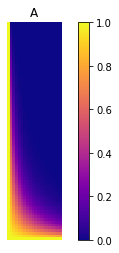

In [19]:
m = 80
n = 20
eps = 2

t = array([i/(m - 1) for i in range(m)])
x = array([1 for i in  range(n)])
p = poly1d(x[::-1])
yp = array([p(t) for t in t])
y = array([y+ eps*(2*random() - 1) for y in yp])

A, b = PolynomialSystem(m, n, t, y)

print("Condition number of matrix A: {}".format(cond(A)))
print("Condition number of matrix A^T A: {}".format(cond(A.T.dot(A))))

plt.figure(1)  
plt.imshow(A, origin='upper', cmap='plasma', vmin=0, vmax=1)
plt.colorbar()
plt.axis('off')
plt.title('A')
plt.show()

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell to benchmark the execution times and stability of your QR and Cholesky solvers. QR should be slower than Cholesky, however QR should be more numerically stable for ill-conditioned systems.
</div>

2.33 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)
1.58 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


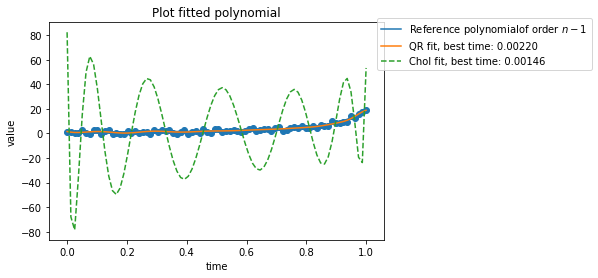

In [20]:
QRtime = %timeit -n 50 -o LinLeastSquareQR(A, b)
Choltime = %timeit -n 50 -o LinLeastSquareChol(A, b)

xQR = LinLeastSquareQR(A, b)
xChol = LinLeastSquareChol(A, b)

plt.figure(2)
plt.scatter(t, y)
plt.plot(t, yp, label='Reference polynomialof order ${n-1}$')
plt.plot(t, polyval(xQR[::-1], t),'-', label='QR fit, best time: {:.5f}'.format(QRtime.best))
plt.plot(t, polyval(xChol[::-1], t), '--', label='Chol fit, best time: {:.5f}'.format(Choltime.best))
plt.legend(loc='center', bbox_to_anchor=(1.3, 0.9))
plt.xlabel("time")
plt.ylabel("value")
plt.title("Plot fitted polynomial")
plt.show()

# Image Reconstruction using Linear Least Squares [30%]

We will implement a *regularized linear least squares* solver to generate a noise free image from a noisy estimate of the image's pixel values and their gradient values. Such a problem arises in many applications, including computational photography and computer graphics.

![Combining noisy image estimates (left) with noisy image gradients (middle two) to obtain a noise-free image (right).](http://beltegeuse.s3-website-ap-northeast-1.amazonaws.com/research/2018_GradientCourse/img/teaser.jpg)

<div class="alert alert-info" role="alert">
    We will only consider grayscale images/gradients.
</div>
<div class="alert alert-info" role="alert">
    <b>Run</b>  the following cell to include the modules for this task.
</div>

In [21]:
from numpy import array, zeros, zeros_like,reshape, loadtxt, absolute, sqrt, sum, clip, absolute
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import lsqr

## Learning objectives
1. Formulating a least squares system that includes an augmentation-based regularization term.
2. Reconstruct a smooth image using a noisy pixel and gradient estimates.
3. Working with a third party least squares solver tailored to sparse matrix representations.


## Loading the data

We provide four (4) CSV files with entries corresponding to the grayscale image values:
* `truthi.csv` -- ground truth image (for reference),
* `noisei.csv` -- noisy image pixel intensities,
* `noisex.csv` -- noisy image pixel horizontal gradient, and
* `noisey.csv` -- noisy image pixel vertical gradient.

<div class="alert alert-info" role="alert">
    <b>Run</b>  the cell bellow to create <i>numpy</i> matrices containing the three (3) input images' data.
</div>

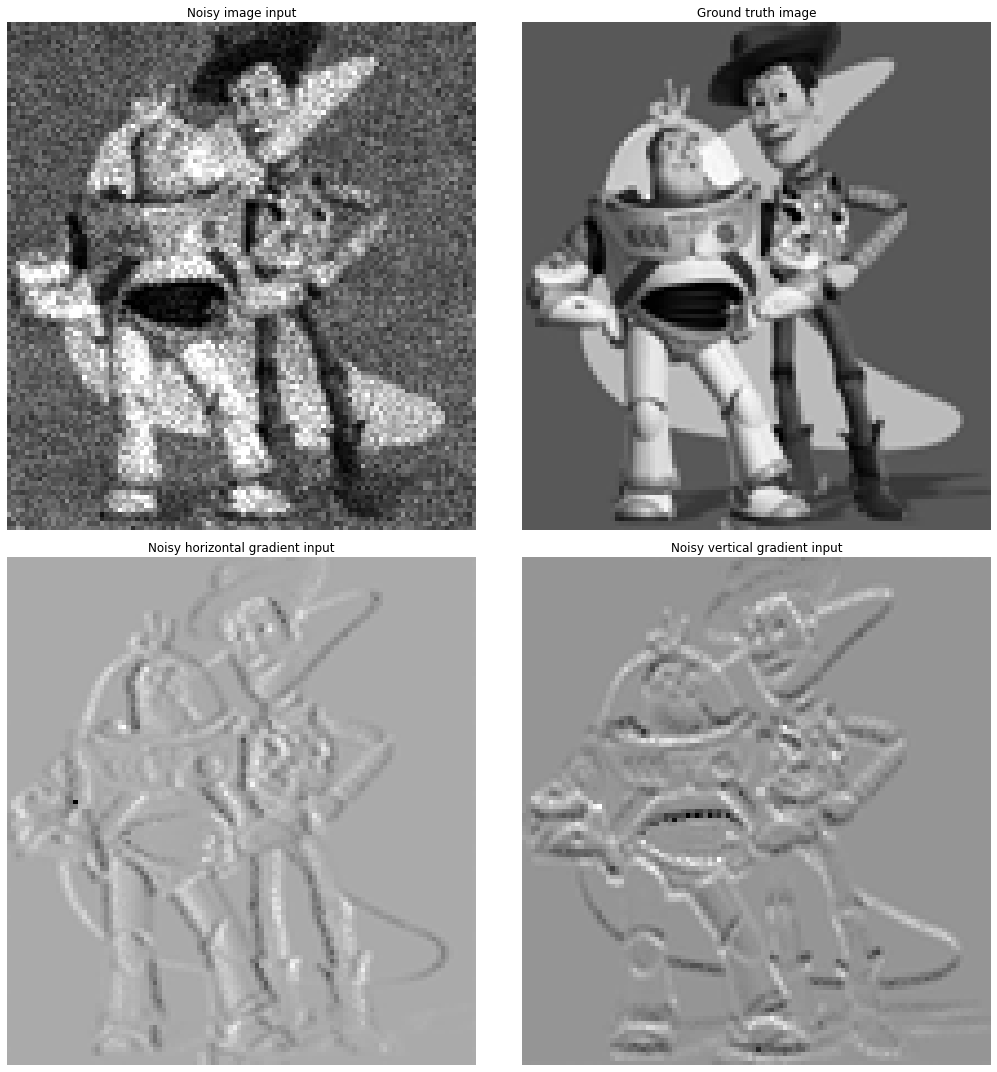

In [22]:
# Load image data, using [2:-2,2:-2] to clp the image boundaries (where gradients are not well defined)
X_0 = clip(loadtxt('noisei.csv', delimiter=',')[2:-2,2:-2],0,1)
X_dx = clip(loadtxt('noisex.csv', delimiter=',')[2:-2,2:-2],-2,2)
X_dy = clip(loadtxt('noisey.csv', delimiter=',')[2:-2,2:-2],-2,2)
X_t = clip(loadtxt('truthi.csv', delimiter=',')[2:-2,2:-2],0,1)


fig, axes = plt.subplots(nrows=2, ncols=2, num=6, figsize=(15,15))
axes[0,0].imshow(X_0, origin='upper', cmap='gray', vmin=0, vmax=1)
axes[0,0].axis('off')
axes[0,0].set_title('Noisy image input')

axes[0,1].imshow(X_t, origin='upper', cmap='gray', vmin=0, vmax=1)
axes[0,1].axis('off')
axes[0,1].set_title('Ground truth image')

axes[1,0].imshow(X_dx, origin='upper', cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('Noisy horizontal gradient input')

axes[1,1].imshow(X_dy, origin='upper', cmap='gray')
axes[1,1].axis('off')
axes[1,1].set_title('Noisy vertical gradient input')


fig.tight_layout()
plt.show()


## Regularized Image Reconstruction [30%] 

We formulate the problem of reconstructing a noise-free image -- given a noisy image and noisy horizontal and vertical image gradients -- as a solution to the following minimization problem:
$$
\argmin{\mathbf{X}} \left(\normsq{\mathbf{X} - \mathbf{X}_0} + \mu\left(\normsq{ \mathbf{D}_{\partial x} \mathbf{X} - \mathbf{X}_{\partial x} } + \normsq{ \mathbf{D}_{\partial y} \mathbf{X} - \mathbf{X}_{\partial y} }\right) \right)
~.$$

Here, $\mathbf{X}_0$ is the input noisy image (stored as a matrix), $\mathbf{X}_{\partial x}$ and $\mathbf{X}_{\partial y}$ are the noisy input image gradients (similarly stored in matrices), $\mathbf{D}_{\partial x}$ and $\mathbf{D}_{\partial y}$ are the horizontal and vertical finite difference operators, $\mu$ is a regularization factor, and the output we seek is $\mathbf{X}$.


While it may seem natural to represent input and output images with matrices, we will instead "vectorize" the images by linearizing their double indices $(i,j)$ to a single vector index $k = i \times n + j$, where $n$ is the image width. The resulting input and output __vectors__ are named analogously to their matrix counterparts: $\bfx$, $\bfx_0$, $\bfx_{\partial x}$ and $\bfx_{\partial y}$.

As such, we can re-write our regularized least-squares problem as:
$$
\argmin{\bfx}\left(\normsq{\bfx - \bfx_0 } + \mu\left(\normsq{ \mathbf{D}_{\partial x} \bfx - \bfx_x } + \normsq{\mathbf{D}_{\partial y} \bfx - \bfx_y }\right)\right)~.
$$

<div class="alert alert-warning" role="alert"> 
     Note that -- after linearizing matrix indices -- the form of $\mathbf{D}_{\partial x}$ and $\mathbf{D}_{\partial y}$ changes to explicitly map, e.g., matrix coordinates $(i,j)$ of $\mathbf{X}$ to the appropriate vector indices $i \times n + j$ of $\bfx$ _in tandem to_ performing their appropriate finite differencing operation.
</div>

<div class="alert alert-success" role="alert"> 
Here are examples of what the operators $\mathbf{D}_{\partial x}$ and $\mathbf{D}_{\partial y}$ would look like for a $2 \times 3$ vectorized input image. Specifically, the input image is vectorized to a single 6-D vector with single index $k = i \times n + j$. <b>We assume 0-indexing, below</b>:
    $$
    \mathbf{D}_{\partial x}\bfx = \begin{bmatrix}
	-1 & 1 & 0 & 0 & 0 & 0 \\
	0 & -1 & 1 & 0 & 0 & 0 \\
	0 & 0 & 0 & -1 & 1 & 0 \\
	0 & 0 & 0 & 0 & -1 & 1
    \end{bmatrix}
    \begin{bmatrix}
	x_{00} \\ x_{01} \\ x_{02} \\ x_{10} \\ x_{11}\\ x_{12} 
    \end{bmatrix}
    :=
    \begin{bmatrix}
	x_{01} - x_{00} \\ 	x_{02} - x_{01} \\ x_{11} - x_{10} \\ 	x_{12} - x_{11}
    \end{bmatrix}
    \approx
    \begin{bmatrix}
	\Delta_x x_{00} \\ 	\Delta_x x_{01}  \\ \Delta_x x_{10}  \\ \Delta_x x_{11}
    \end{bmatrix}
    $$
    $$
	\mathbf{D}_{\partial y} \bfx= \begin{bmatrix}
	-1 & 0 & 0 & 1 & 0 & 0 \\
	0 & -1 & 0 & 0 & 1 & 0 \\
	0 & 0 & -1 & 0 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
	x_{00} \\ x_{01} \\ x_{02} \\ x_{10} \\ x_{11}\\ x_{12} 
    \end{bmatrix}
    = 
    \begin{bmatrix}
	x_{10} - x_{00}  \\ x_{11} - x_{01} \\ x_{12} - x_{02} 
    \end{bmatrix}
    :=
    \begin{bmatrix}
	\Delta_y x_{00} \\ 	\Delta_y x_{01}  \\ \Delta_y x_{02} 
    \end{bmatrix}
    $$
    where $\Delta_x$ and $\Delta_y$ are the horizontal and vertical finite 
    differences approximation of the gradient at a given pixel.
    For a general $m \times n$ image, $\mathbf{D}_{\partial x}$ will be of size $(mn - m) \times mn$ and $\mathbf{D}_{\partial y}$ of size $(mn - n) \times mn$. Here, rows correspond to finite difference constraints
    and columns to the appropriate vectorized image coordinates.

</div>

  
To solve this regularized least squares problem, we need to express our (vectorized) minimization problem as a squared-residual term in matrix-vector form. After some algebraic manipulation, we arrive at:
$$
\begin{align}
& \normsq{\bfx - \bfx_0 } + \mu\left(\normsq{ \mathbf{D}_{\partial x} \bfx - \bfx_x } + \normsq{\mathbf{D}_{\partial y} \bfx - \bfx_y }\right) \\
& =
\normsq{\begin{bmatrix}
\bfx - \bfx_0  \\
\sqrt{\mu} (\mathbf{D}_{\partial x} \bfx - \bfx_x)  \\ 
\sqrt{\mu} (\mathbf{D}_{\partial y} \bfx - \bfx_y)  
\end{bmatrix}
} \\
& = 
\normsq{
\begin{bmatrix}
\mathbf{I} \\
\sqrt{\mu} \mathbf{D}_{\partial x}  \\ 
\sqrt{\mu} \mathbf{D}_{\partial y}
\end{bmatrix}\bfx 
-
\begin{bmatrix}
\bfx_0  \\
\sqrt{\mu} \bfx_x  \\ 
\sqrt{\mu} \bfx_y  
\end{bmatrix}
} \\
& := 
\normsq{\mathbf{A}\bfx - \bfb}
\end{align}
$$

While you may be tempted to use one of your own solvers (don't let us stop you, after the fact!), the system above warrants the use of a more engineered, third party algorithm: $\mathbf{A}$ is large and sparse. The combination of these two properties would render using any of your solvers much more challenging -- at least in their vanilla form.

<div class="alert alert-info" role="alert"> 
    <b style="color:green;">&#9745;</b> Complete the implementation of a function that takes the noisy data as input and returns a denoised output image as the solution to the regularized linear least square problem above, in the cell below:
</div>

<div class="alert alert-success" role="alert"> 
    Use the `lil_matrix` function to initialize $\mathbf{A}$ in a manner that enables underlying <b>sparse matrix</b> operations. 
</div>

In [23]:
def imageReconsLS(X_0, X_dx, X_dy, mu = 10.):
    """
    Use a built-in linear least squares solver that leverages sparse matrix representations to find the best fit solution of the image reconstruction problem

    Parameters: 
    X_0 (np.array(m, n)): Noisy image estimate
    X_dx (np.array(m, n)): Noisy horizontal gradient of the image
    X_dy (np.array(m, n)): Noisy vertical gradient estimate of the image
    mu (float): regularization parameter

    Returns: 
    X_mu (np.array(m, n)): least squares solution of A X_mu = b
    """
    
    
    # Store the dimensions of X_0
    m, n = X_0.shape;
    mn = m * n
    
    # Initialize our output reconstructed image X_mu
    X_mu = zeros_like(X_0)
    
    # mu must be greater or equal to 0
    if mu < 0:
        raise Exception("Negative regularization is not a good idea!")
    
    # Function that maps an m x n matrix index to an (m*n) x 1 vector index
    # Use this to populate A
    mat2vec = lambda i, j : n*i + j
    
    # Initialize A with lil_matrix and b
    # 
    #   regularization constraints have size mn * mn
    #   horizontal gradient constraints have size (mn - m) * mn
    #   vertical gradient constraints have size (mn - n) * mn
    #   total number of constraints are (3mn - m - n) * mn
    
    # Initialization goes here
    
    # Loop over all the pixels to fill A and b
    # Don't forget to keep track of the number of constraints
    
    #Loop over rows
        #Loop over columns
                                   
            # Add noisy image constraints 
            # in matrix form, these constraints correspond to: 
            # X_mu[i, j] =  X_0[i,j]

            # Vertical gradient, if i < m - 1 
            # in matrix form, these constraints correspond to: 
            # mu (X_mu[i+1,j] -  X_mu[i,j])  = mu X_dy[i, j]
   
            # Horizontal gradient, if j < n - 1 
            # in matrix form, these constraints correspond to: 
            # mu (X_mu[i, j+1] -  X_mu[i, j]) = mu X_dx[i, j]
    
    # YOUR CODE HERE
    A = lil_matrix((3*mn-m-n, mn)) #defining matrix A
    b = zeros(3*mn-m-n)  #defining matrix b
    
#     print(A.size)
#     print(b.size)
    for i in range(m):
        for j in range(n):
            
            # Noisy image constraints 
            b[mat2vec(i, j)] = X_0[i ,j]   # X0 in b, first set of rows
            A[mat2vec(i, j), mat2vec(i, j)] = 1  # the identity matrix in A, first set of rows
            
            # Vertical gradient (Dy)
            if i < m - 1:
                b[mat2vec(i, j) + 2*mn - m]= X_dy[i ,j] * sqrt(mu)  # initializing third set of rows of b
                A[mat2vec(i, j) + 2*mn - m, mat2vec(i+1, j)]= sqrt(mu)*(1)  # third set of rows of A with value 1
                A[mat2vec(i, j) + 2*mn - m, mat2vec(i, j)] = sqrt(mu)*(-1)  # third set of rows of A with value -1

            # Horizontal gradient (Dx)
            if j < n - 1:
                b[i*(n-1) + j + mn] = sqrt(mu) * X_dx[i ,j]  # initializing second set of rows of b
                A[i*(n-1) + j + mn, mat2vec(i, j+1)] = sqrt(mu)*(1)  # second set of rows of A with value 1
                A[i*(n-1) + j + mn, mat2vec(i, j)] = sqrt(mu)*(-1)  # second set of rows of A with value -1

                
#     raise NotImplementedError()
                
    # Solve with a built-in least squares solver
    a, istop, itn, r1norm = lsqr(A, b)[:4]

    # Reshape the resulting vector solution into the 2D output image resolution
    X_mu = reshape(a, (m, n))

    return X_mu

# <div class="alert alert-info" role="alert">
    <b>Run</b>  the following cell to test your solution.
</div>

Text(0.5, 1.0, 'Ground truth')

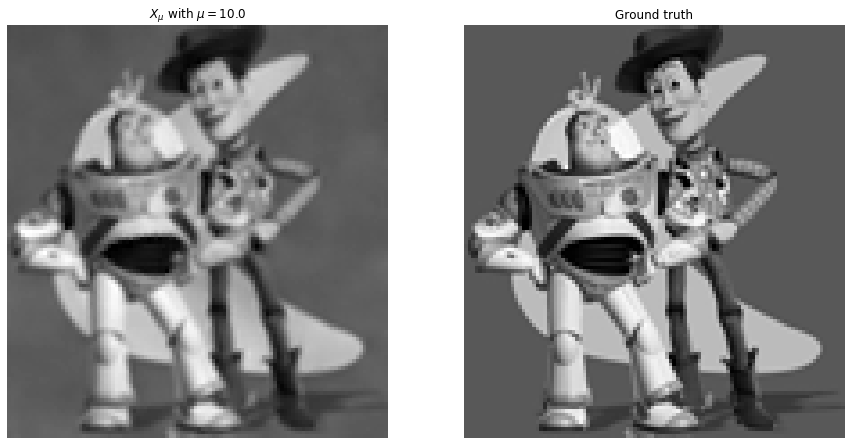

In [24]:
mu = 10.
X_mu = imageReconsLS(X_0, X_dx, X_dy, mu)

fig, axes = plt.subplots(nrows=1, ncols=2, num=7, figsize=(15,15))
axes[0].imshow(X_mu, origin='upper', cmap='gray', vmin=0, vmax=1)
axes[0].axis('off')
axes[0].set_title('$X_\mu$ with $\mu = ${}'.format(mu))

axes[1].imshow(X_t, origin='upper', cmap='gray', vmin=0, vmax=1)
axes[1].axis('off')
axes[1].set_title('Ground truth')

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell to test the behaviour of your solution for different values of the regularization coefficient $\mu$. Try to guess what will happen before running the cell...
</div>

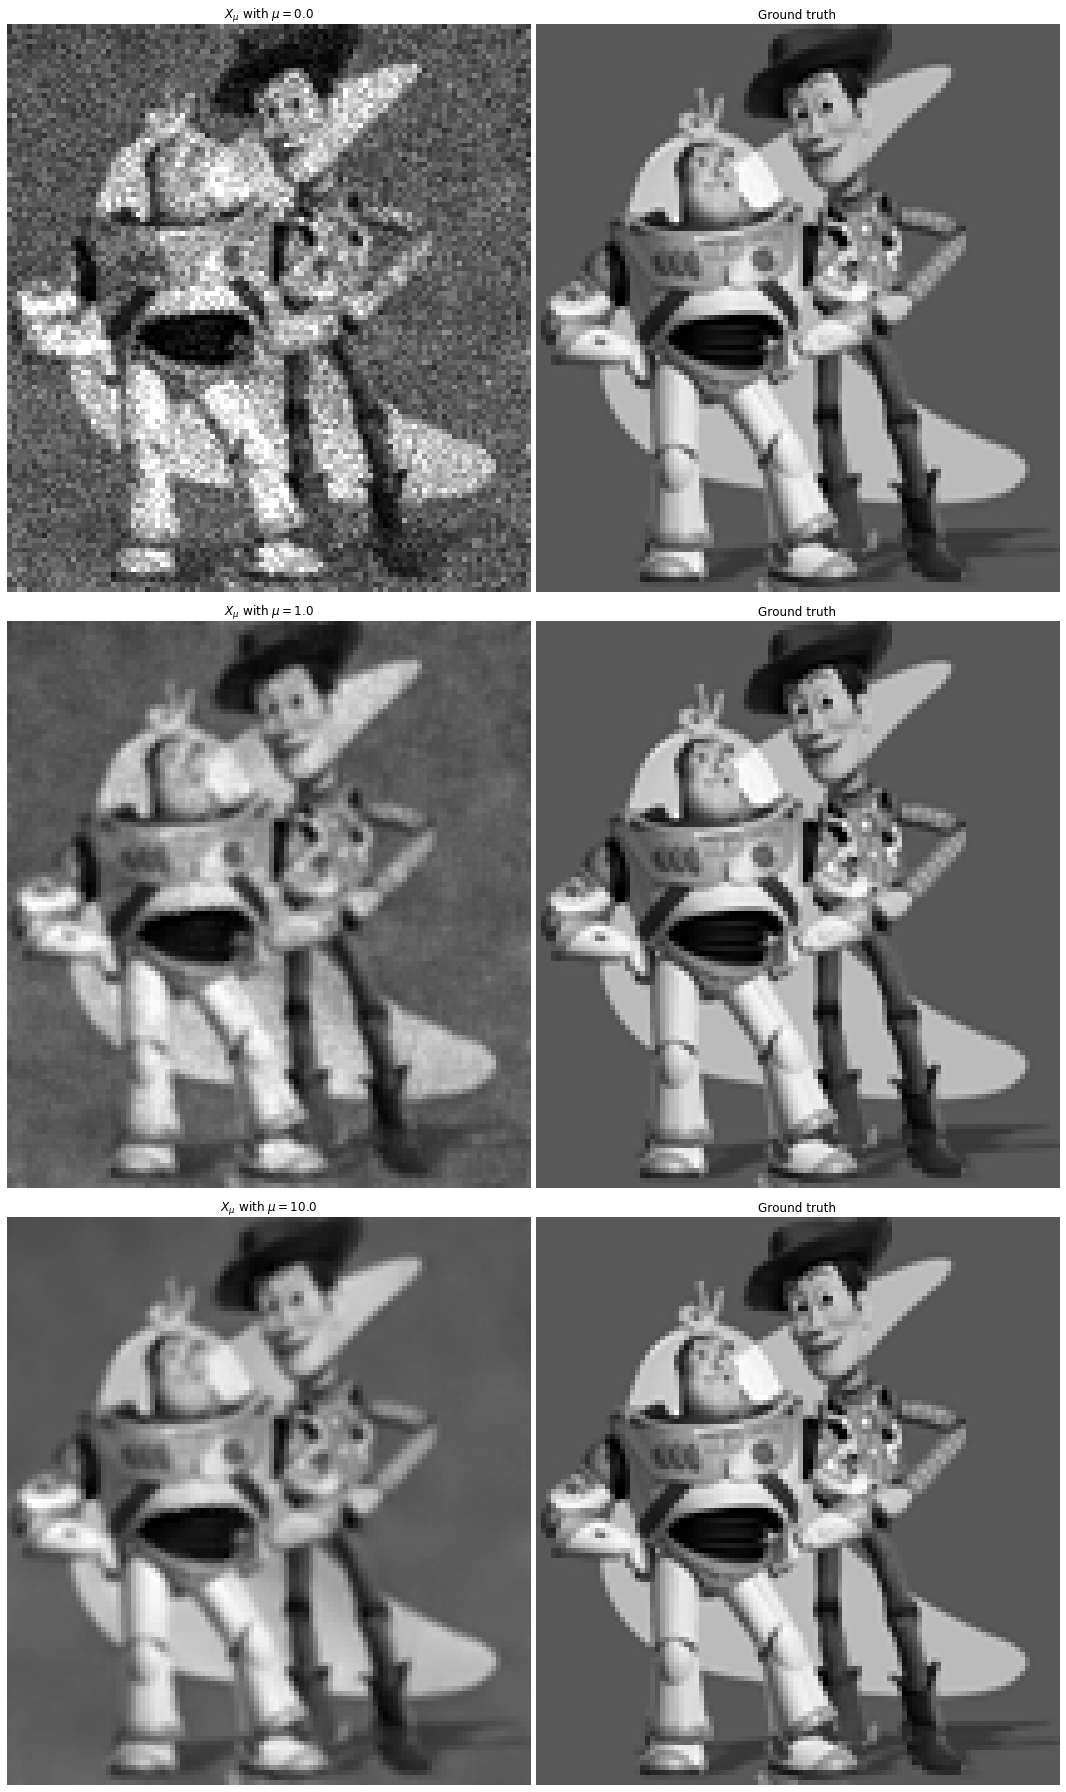

In [25]:
mus = [0.,1.,10.]
fig, axes = plt.subplots(nrows=len(mus), ncols=2, num=7, figsize=(15,25))

for i, mu in enumerate(mus):
    X_mu = imageReconsLS(X_0, X_dx, X_dy, mu)
    axes[i,0].imshow(X_mu, origin='upper', cmap='gray', vmin=0, vmax=1)
    axes[i,0].axis('off')
    axes[i,0].set_title('$X_\mu$ with $\mu = ${}'.format(mu))

    axes[i,1].imshow(X_t, origin='upper', cmap='gray', vmin=0, vmax=1)
    axes[i,1].axis('off')
    axes[i,1].set_title('Ground truth')

fig.tight_layout()
plt.show()